## Exploratory Data Analysis
---

### Importation of Important libraries and Datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime

In [2]:
# Show plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

In [3]:
# importing our dataset into working environment
client_df = pd.read_csv('/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/raw/client_data.csv')
price_df = pd.read_csv('/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/raw/price_data.csv')

In [4]:
##we will see the first five rows of our datasets
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


#### The client data shows that there is a missing in datasets, and also we will see that there is numerical and categorical variables in our datasets so that we will convert the datasets into the one that will be  used as inputs for machine learning
---

### Statistical and Data type Summary

In [6]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [7]:
price_df.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [8]:
### summary of dataframes
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### We see that our client data features are skewed when we look at the percentiles, but the price data looks normal
---

In [10]:
### Looking for the presence of Missing values in percentages
pd.DataFrame({"Missing values (%)": client_df.isnull().sum()/len(client_df.index)*100})

,Missing values (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


In [11]:
pd.DataFrame({"Missing values (%)": price_df.isnull().sum()/len(price_df.index)*100})

,Missing values (%)
id,0.0
price_date,0.0
price_off_peak_var,0.0
price_peak_var,0.0
price_mid_peak_var,0.0
price_off_peak_fix,0.0
price_peak_fix,0.0
price_mid_peak_fix,0.0


#### Data Visualization

In [12]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

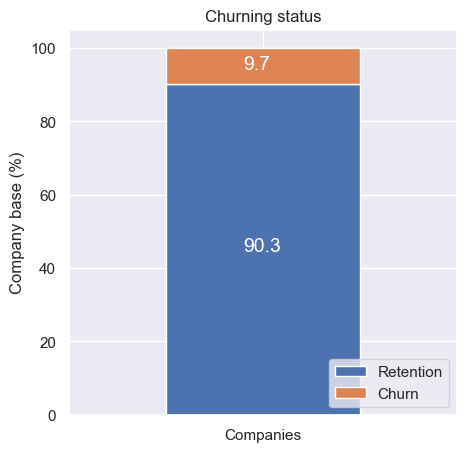

In [13]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

#### About 9.7% of the of total customers have churned. However, the data missed the feature which can indicate the activities of customer types which is necessary to include in our modelling to identify if there is SME will highly involved in the churning conditions, we will ask our client to include for us in data preparaion process
---

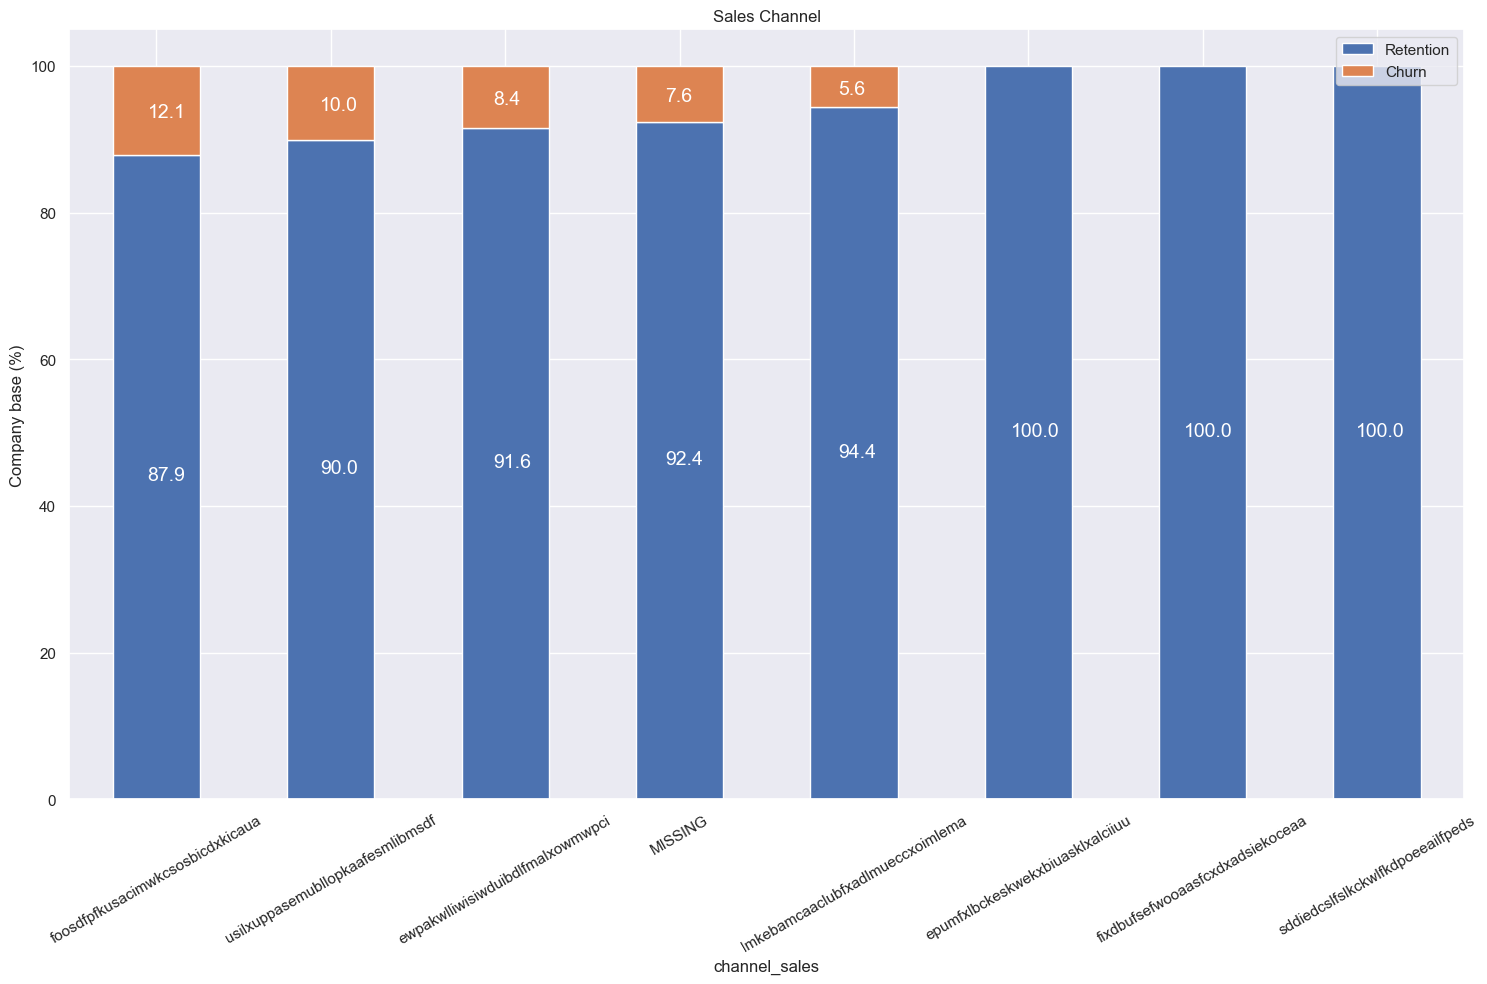

In [14]:
channel = client_df[["id","channel_sales", "churn"]]
channel = channel.groupby([channel["channel_sales"],channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

In [15]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,
"Total companies": channel_total }).sort_values(by="Churn percentage",
ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.140954,6754.0
usilxuppasemubllopkaafesmlibmsdf,10.036364,1375.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.398656,893.0
MISSING,7.597315,3725.0
lmkebamcaaclubfxadlmueccxoimlema,5.588714,1843.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,3.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,11.0


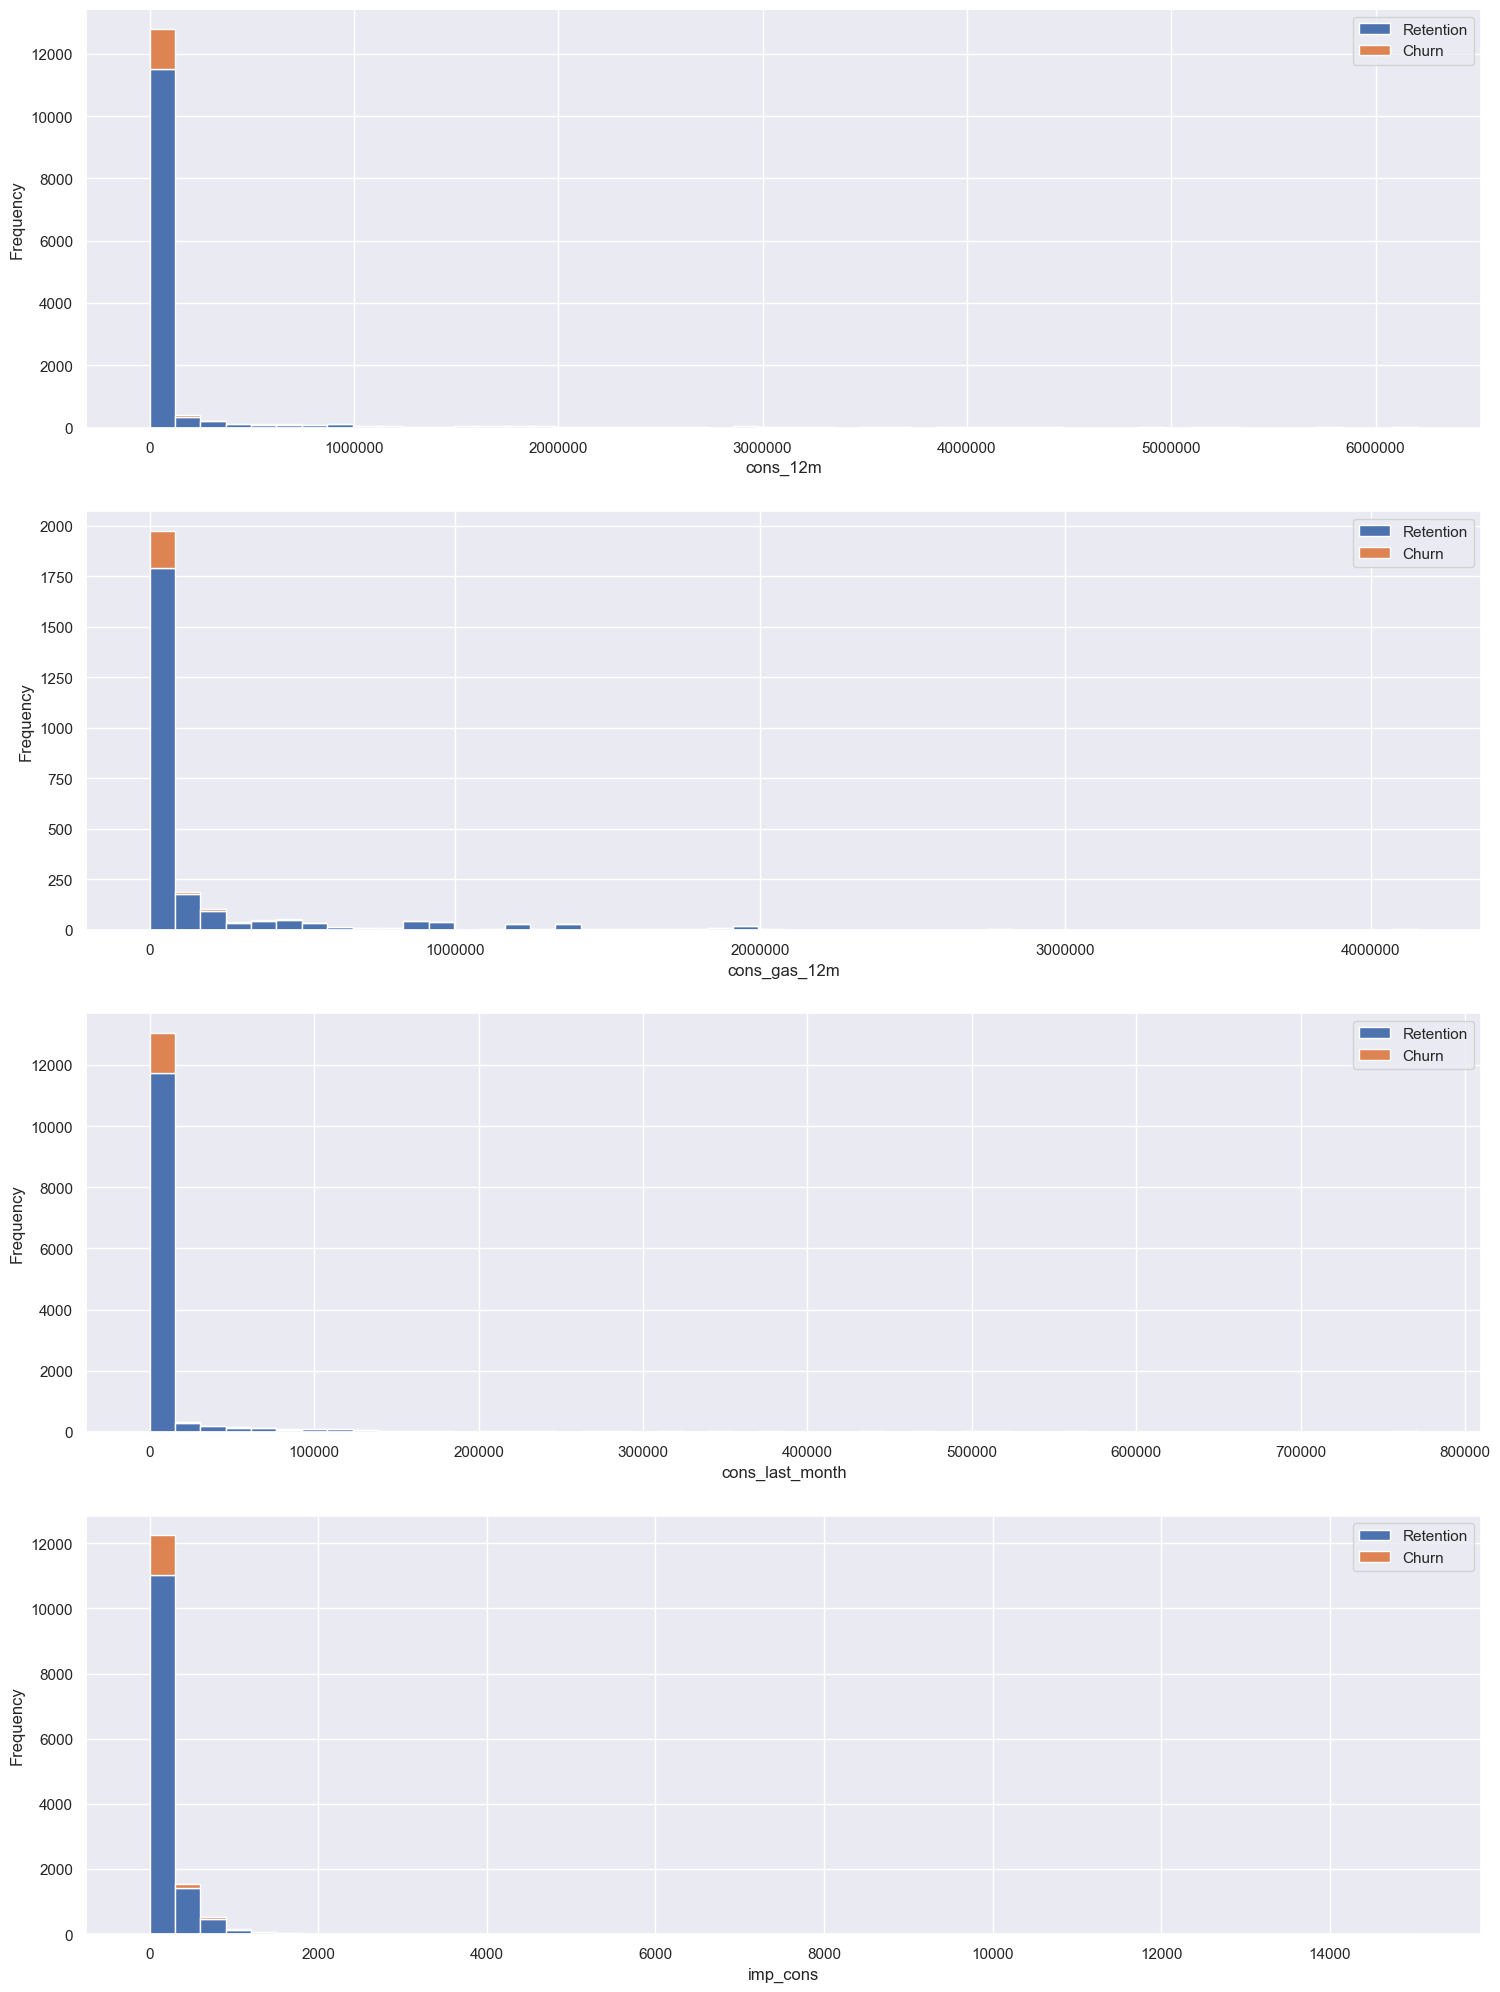

In [16]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

##### We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution. The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution of data based on a ﬁve number summary (“minimum”, ﬁrst quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed.

In [17]:
forecast = client_df[['id', 'forecast_cons_12m','forecast_cons_year', 'forecast_discount_energy', 
'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 
'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'churn']]

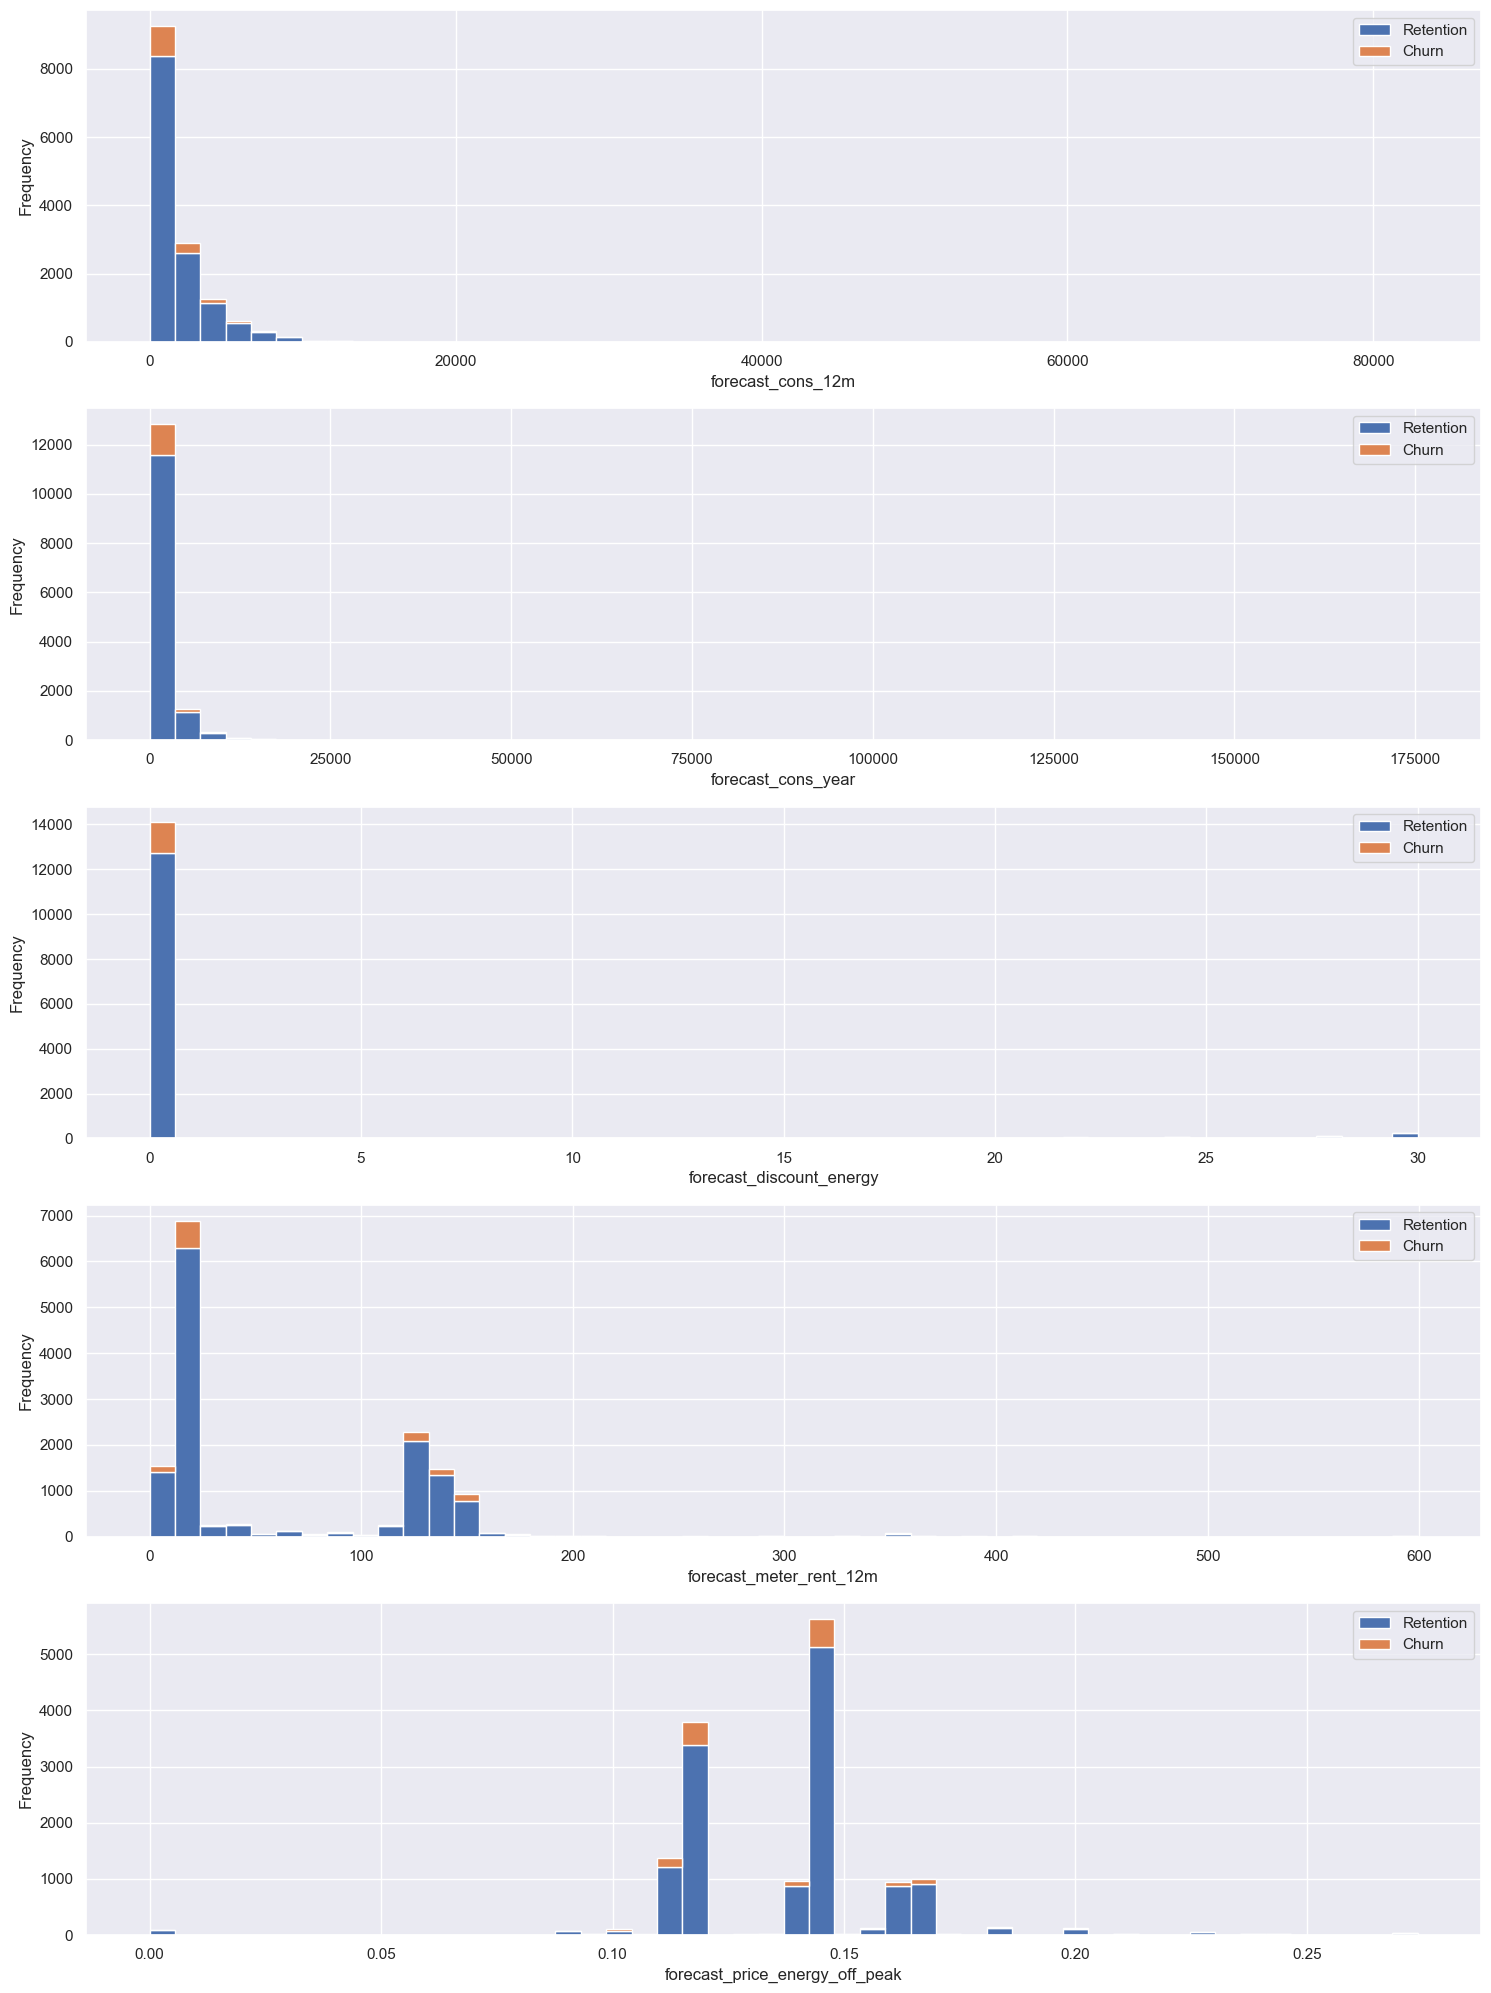

In [18]:
fig, axs = plt.subplots(nrows=5, figsize=(18,25))
plot_distribution(forecast, 'forecast_cons_12m', axs[0])
plot_distribution(forecast, 'forecast_cons_year', axs[1])
plot_distribution(forecast, 'forecast_discount_energy', axs[2]) 
plot_distribution(forecast, 'forecast_meter_rent_12m', axs[3])
plot_distribution(forecast, 'forecast_price_energy_off_peak', axs[4])

In [19]:
date= client_df[['id','date_activ', 'date_end', 'date_modif_prod','date_renewal','churn']].copy()
### convert the date data into pandas datetime

date['date_activ'] =pd.to_datetime(date["date_activ"], format='%Y-%m-%d')
date['date_end'] =pd.to_datetime(date["date_end"], format='%Y-%m-%d')
date['date_modif_prod'] =pd.to_datetime(date['date_modif_prod'], format='%Y-%m-%d')
date['date_renewal'] =pd.to_datetime(date['date_renewal'], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')


In [20]:
from pandas import DataFrame


def plot_date(data, column):
    """Plot the distribution of date to churn"""
    temp =  data[[column, "churn", "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize='small')
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month

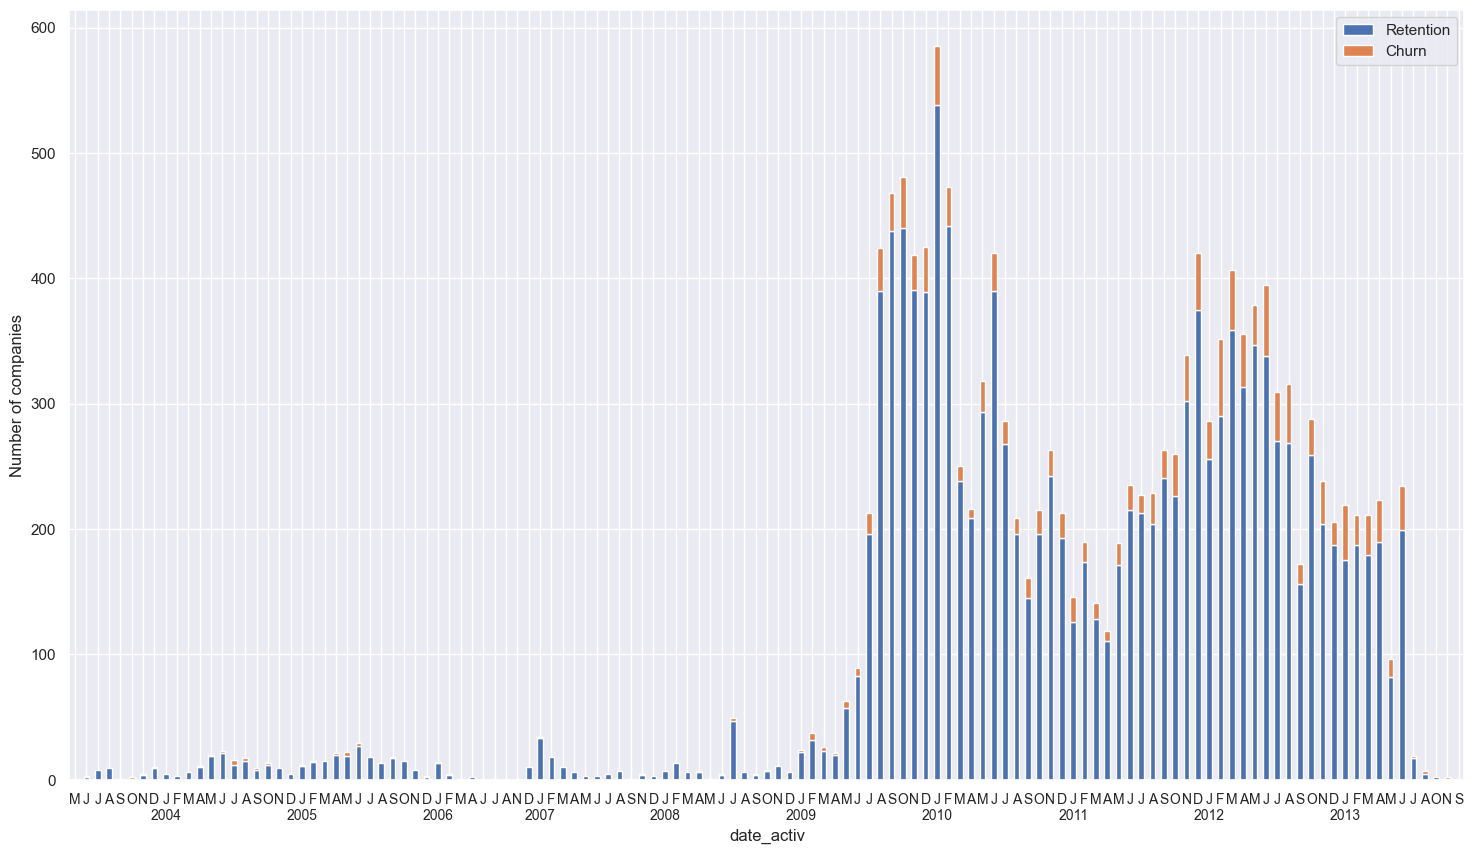

In [21]:
plot_date(date, 'date_activ')

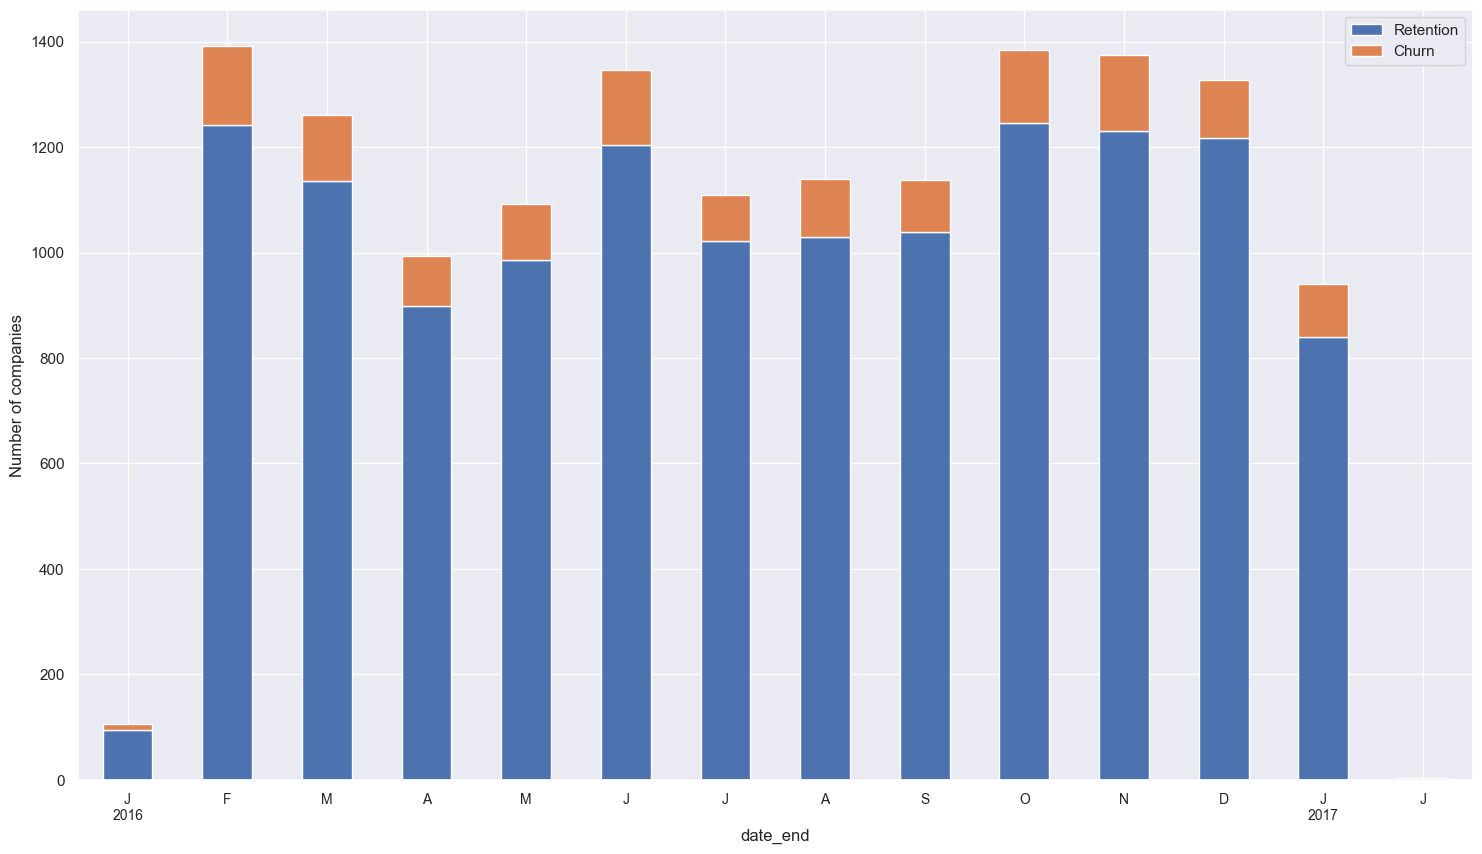

In [22]:
plot_date(date, 'date_end')

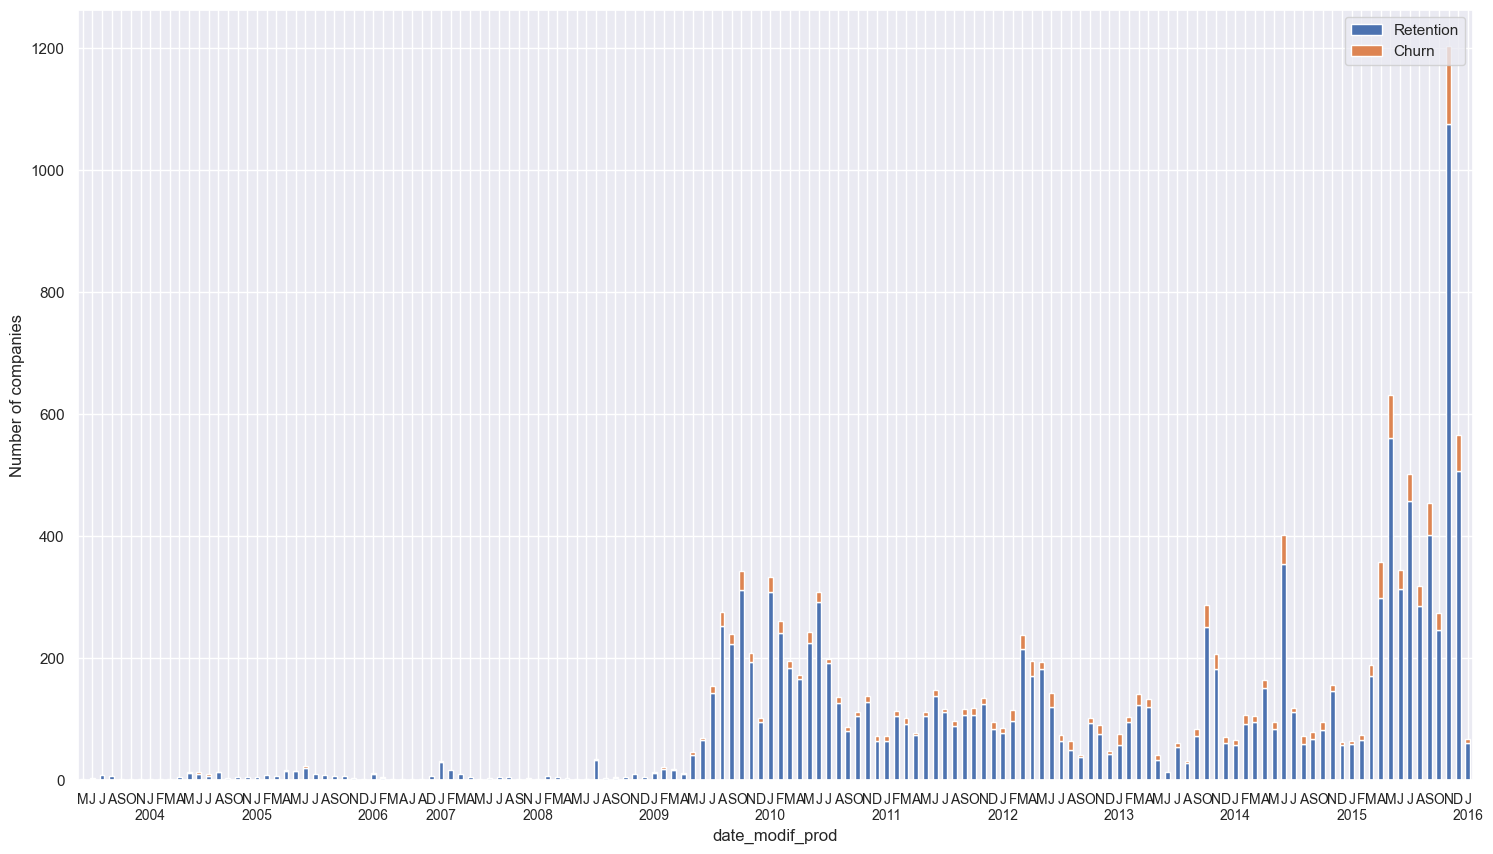

In [23]:
plot_date(date, 'date_modif_prod')

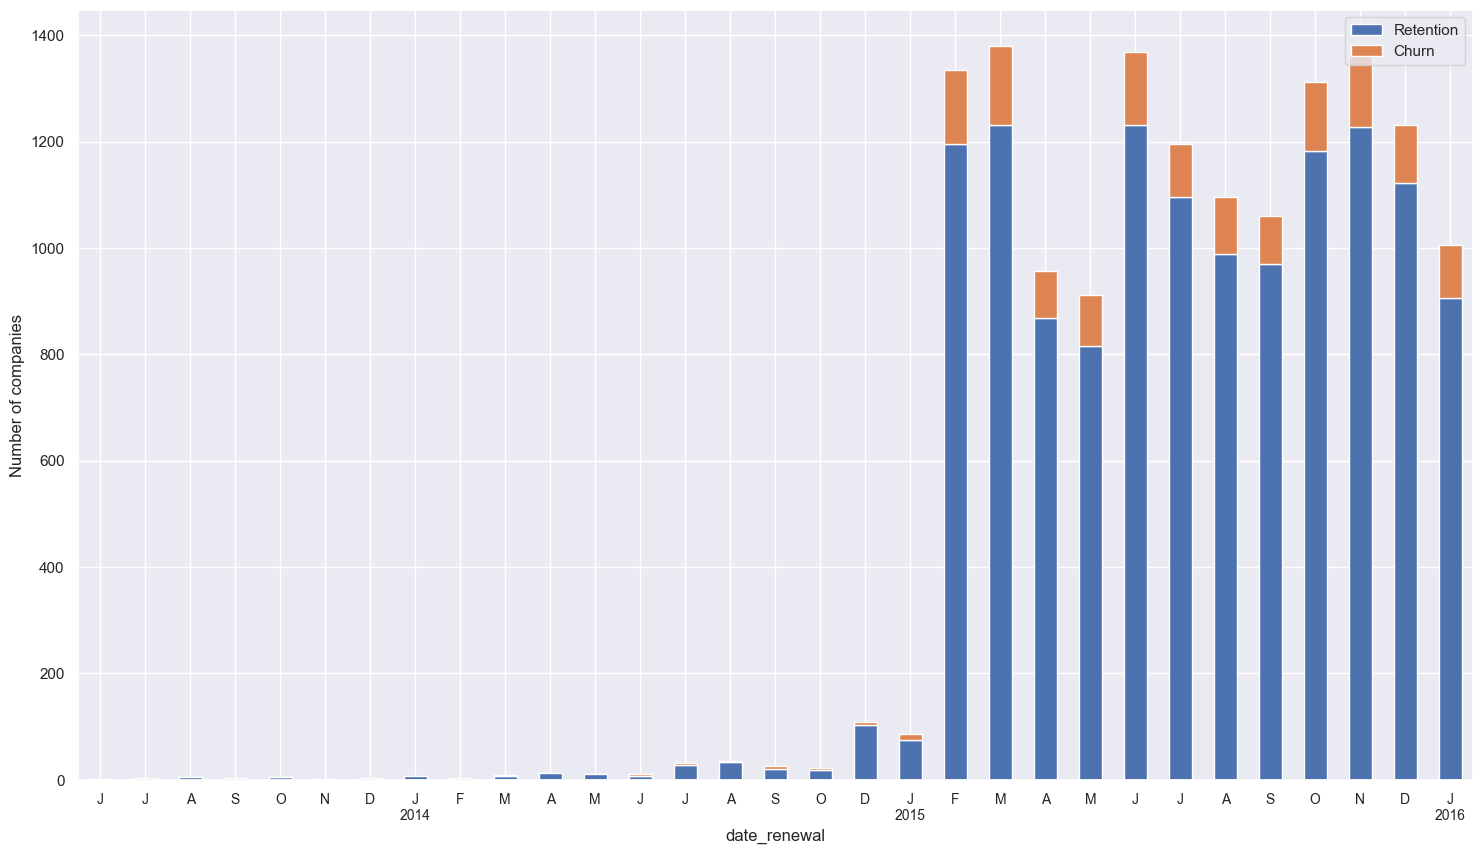

In [24]:
plot_date(date, 'date_renewal')

In [25]:
type_contract = client_df[['id', 'has_gas', 'churn']]

In [26]:
contract = type_contract.groupby([type_contract["churn"],type_contract["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

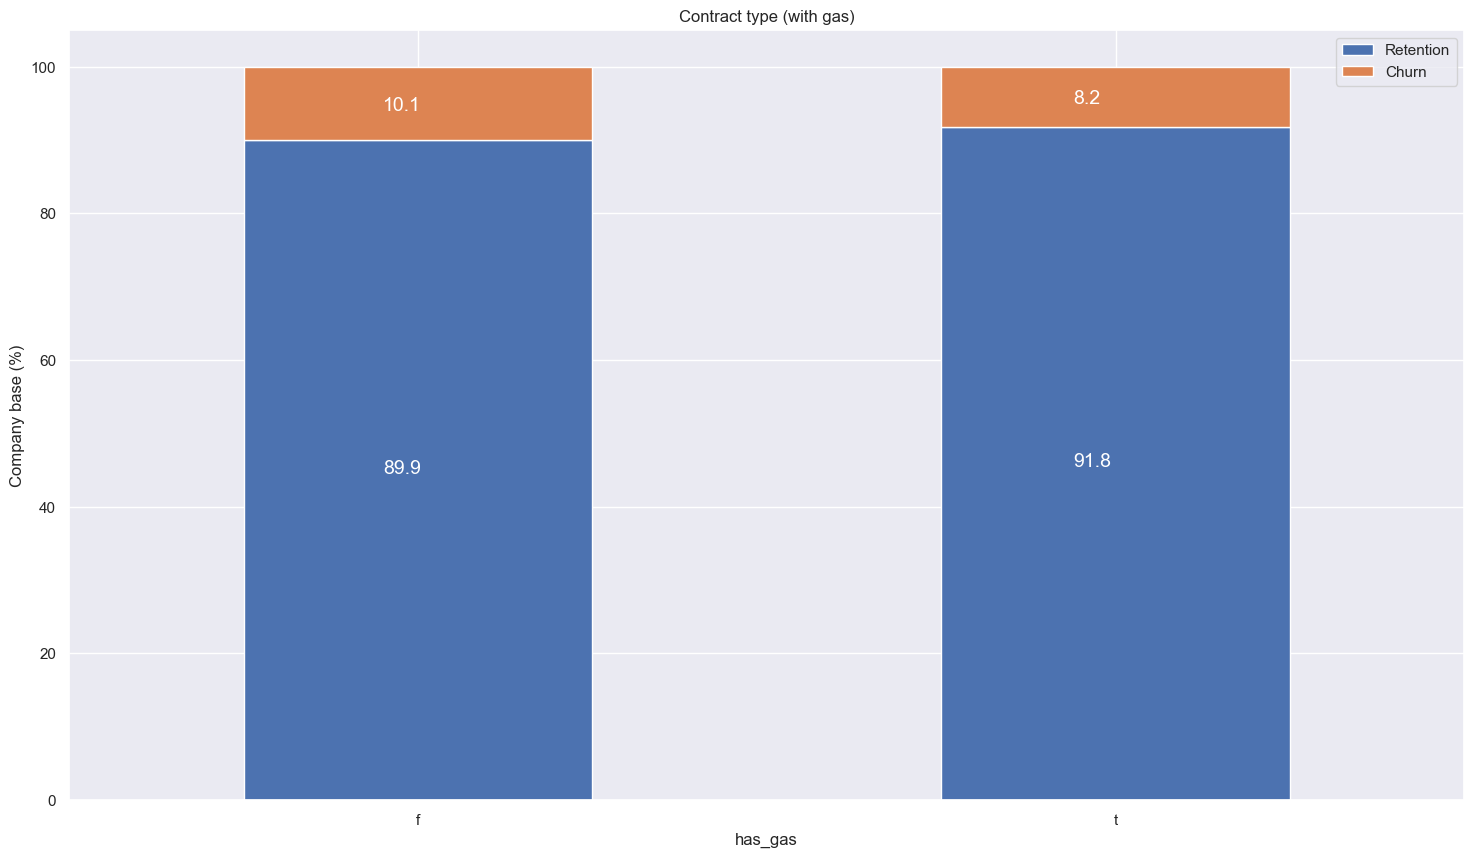

In [27]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

#### Hypothesis Investigation

#### *  investigate whether price sensitivity has some influence on churn
    > Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months
---

In [28]:
client_df[client_df.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [29]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')

In [30]:
#Transform date columns to datetime type
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

In [31]:
if not os.path.exists(os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/", "final")):
    os.makedirs(os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/", "final"))

In [32]:
PICKLE_TRAIN_DIR = os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/final", "client.pkl")
PICKLE_HISTORY_DIR = os.path.join("/home/miki/Desktop/Docker/BCG/Customer-Churning-Analysis/data/final", "price.pkl")

In [ ]:
pd.to_pickle(client_df, PICKLE_TRAIN_DIR)
pd.to_pickle(price_df, PICKLE_HISTORY_DIR)